<a href="https://colab.research.google.com/github/shreya139/Circuits-in-Stocks/blob/main/Tatasteel_lstm_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [8]:
data = pd.read_csv("/content/TATASTEEL.csv")

In [9]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,111.500000,115.099998,111.500000,114.245003,50.783611,38658030
1,2022-01-04,115.300003,115.970001,113.650002,114.879997,51.065880,59757310
2,2022-01-05,114.699997,118.080002,114.125000,117.760002,52.346085,61861760
3,2022-01-06,117.199997,118.300003,115.555000,116.324997,51.708202,53354000
4,2022-01-07,116.519997,117.400002,114.785004,116.035004,51.579296,39738570


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       248 non-null    object 
 1   Open       248 non-null    float64
 2   High       248 non-null    float64
 3   Low        248 non-null    float64
 4   Close      248 non-null    float64
 5   Adj Close  248 non-null    float64
 6   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.7+ KB


In [11]:
length_data = len(data)     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 248
Train data length : 174
Validation data lenth : 74


In [12]:
train_data = data[:length_train].iloc[:,:2]
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

,Date,Open
0,2022-01-03,111.500000
1,2022-01-04,115.300003
2,2022-01-05,114.699997
3,2022-01-06,117.199997
4,2022-01-07,116.519997
...,...,...
169,2022-09-08,108.400002
170,2022-09-09,107.000000
171,2022-09-12,106.800003
172,2022-09-13,108.000000


In [13]:
validation_data = data[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

,Date,Open
174,2022-09-15,108.650002
175,2022-09-16,106.199997
176,2022-09-19,106.199997
177,2022-09-20,104.199997
178,2022-09-21,105.800003
...,...,...
243,2022-12-26,102.800003
244,2022-12-27,106.650002
245,2022-12-28,111.050003
246,2022-12-29,109.000000


In [14]:
dataset_train = train_data.Open.values
dataset_train.shape

(174,)

In [15]:
# Change 1d array to 2d array
# Changing shape from (1692,) to (1692,1)
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(174, 1)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(174, 1)

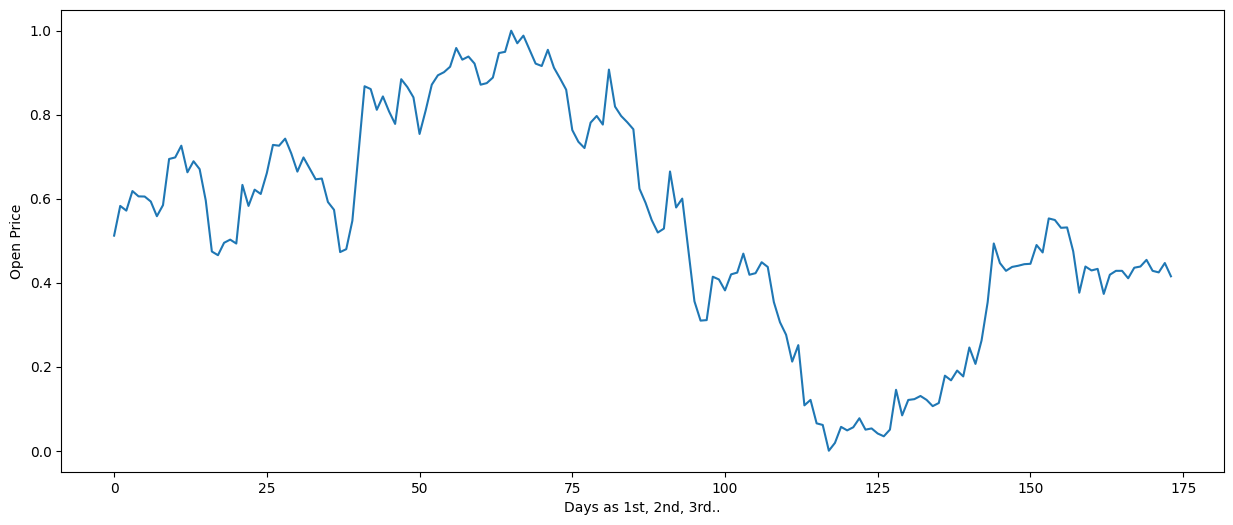

In [17]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

In [18]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])

# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [19]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (124, 50)
Shape of y_train before reshape : (124,)


In [20]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (124, 50, 1)
Shape of y_train after reshape : (124, 1)


In [21]:
X_train[0]

array([[0.51210431],
       [0.58286787],
       [0.57169458],
       [0.61824951],
       [0.60558656],
       [0.60521419],
       [0.59338919],
       [0.55837993],
       [0.58473004],
       [0.69459972],
       [0.69832406],
       [0.72625702],
       [0.66294228],
       [0.68919933],
       [0.6703911 ],
       [0.5959032 ],
       [0.47430173],
       [0.46554937],
       [0.49506519],
       [0.50260707],
       [0.49329608],
       [0.63296089],
       [0.58286787],
       [0.62160147],
       [0.61135947],
       [0.66108011],
       [0.72811919],
       [0.72625702],
       [0.74301683],
       [0.70782131],
       [0.66452513],
       [0.69832406],
       [0.67243953],
       [0.64618248],
       [0.64804479],
       [0.59217886],
       [0.57355689],
       [0.47299819],
       [0.47988823],
       [0.54748609],
       [0.70903164],
       [0.86778415],
       [0.86108023],
       [0.81173182],
       [0.84357552],
       [0.80800748],
       [0.77811929],
       [0.884

In [22]:
y_train[0]

array([0.75418999])

In [23]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True,
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam",
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
4/4 [==============================] - 5s 47ms/step - loss: 0.9373 - accuracy: 0.0000e+00
Epoch 2/50
4/4 [==============================] - 0s 53ms/step - loss: 0.5282 - accuracy: 0.0161
Epoch 3/50
4/4 [==============================] - 0s 49ms/step - loss: 0.5151 - accuracy: 0.0081
Epoch 4/50
4/4 [==============================] - 0s 44ms/step - loss: 0.4800 - accuracy: 0.0081
Epoch 5/50
4/4 [==============================] - 0s 45ms/step - loss: 0.4658 - accuracy: 0.0081
Epoch 6/50
4/4 [==============================] - 0s 46ms/step - loss: 0.3799 - accuracy: 0.0000e+00
Epoch 7/50
4/4 [==============================] - 0s 49ms/step - loss: 0.3757 - accuracy: 0.0161
Epoch 8/50
4/4 [==============================] - 0s 43ms/step - loss: 0.3025 - accuracy: 0.0161
Epoch 9/50
4/4 [==============================] - 0s 42ms/step - loss: 0.3623 - accuracy: 0.0000e+00
Epoch 10/50
4/4 [==============================] - 0s 43ms/step - loss: 0.3891 - accuracy: 0.0081
Epoch 11/50
4/4 [

In [24]:
# Losses
history.history["loss"]

[0.9372732043266296,
 0.5281547904014587,
 0.5151185393333435,
 0.480040043592453,
 0.465771347284317,
 0.37988734245300293,
 0.3756502866744995,
 0.30250757932662964,
 0.36226728558540344,
 0.38910260796546936,
 0.30646461248397827,
 0.3088603615760803,
 0.34428226947784424,
 0.23192600905895233,
 0.2916564345359802,
 0.32759419083595276,
 0.2655772566795349,
 0.2666551172733307,
 0.30284297466278076,
 0.26672619581222534,
 0.2640438675880432,
 0.24815496802330017,
 0.2666100859642029,
 0.24237242341041565,
 0.2380160391330719,
 0.2665243446826935,
 0.2111411988735199,
 0.18446438014507294,
 0.14285585284233093,
 0.18245495855808258,
 0.23737718164920807,
 0.16397137939929962,
 0.16887380182743073,
 0.16247648000717163,
 0.15832768380641937,
 0.19673128426074982,
 0.1698308140039444,
 0.19595526158809662,
 0.15595048666000366,
 0.15102683007717133,
 0.1691736876964569,
 0.1150217056274414,
 0.184806689620018,
 0.1540822982788086,
 0.12609173357486725,
 0.13456501066684723,
 0.15689732

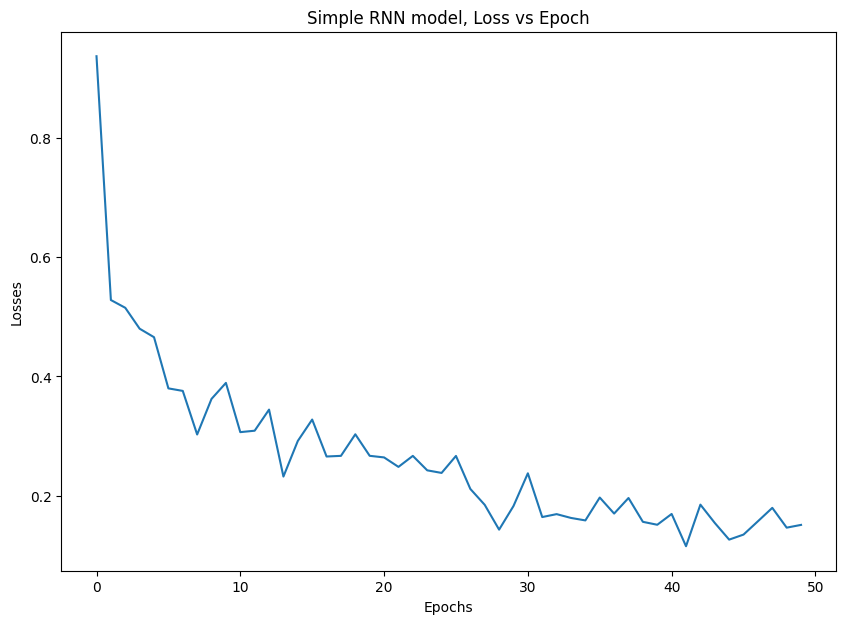

In [25]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

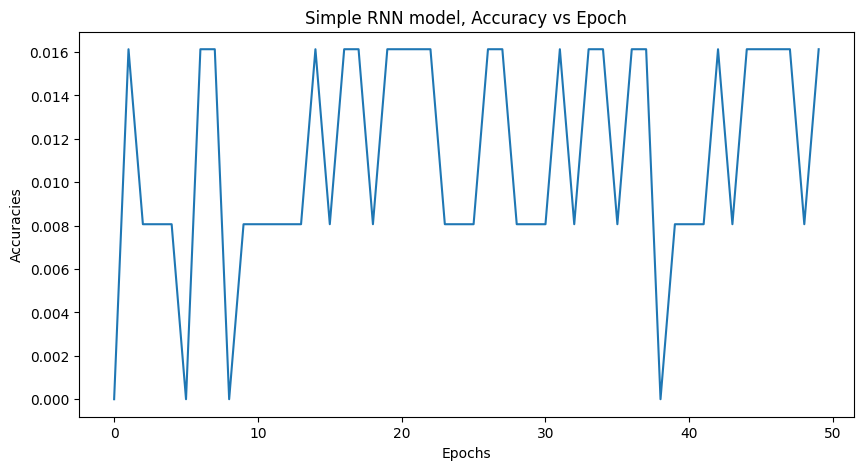

In [26]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

In [27]:
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

4/4 [==============================] - 1s 13ms/step


(124, 1)

In [28]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(124, 1)

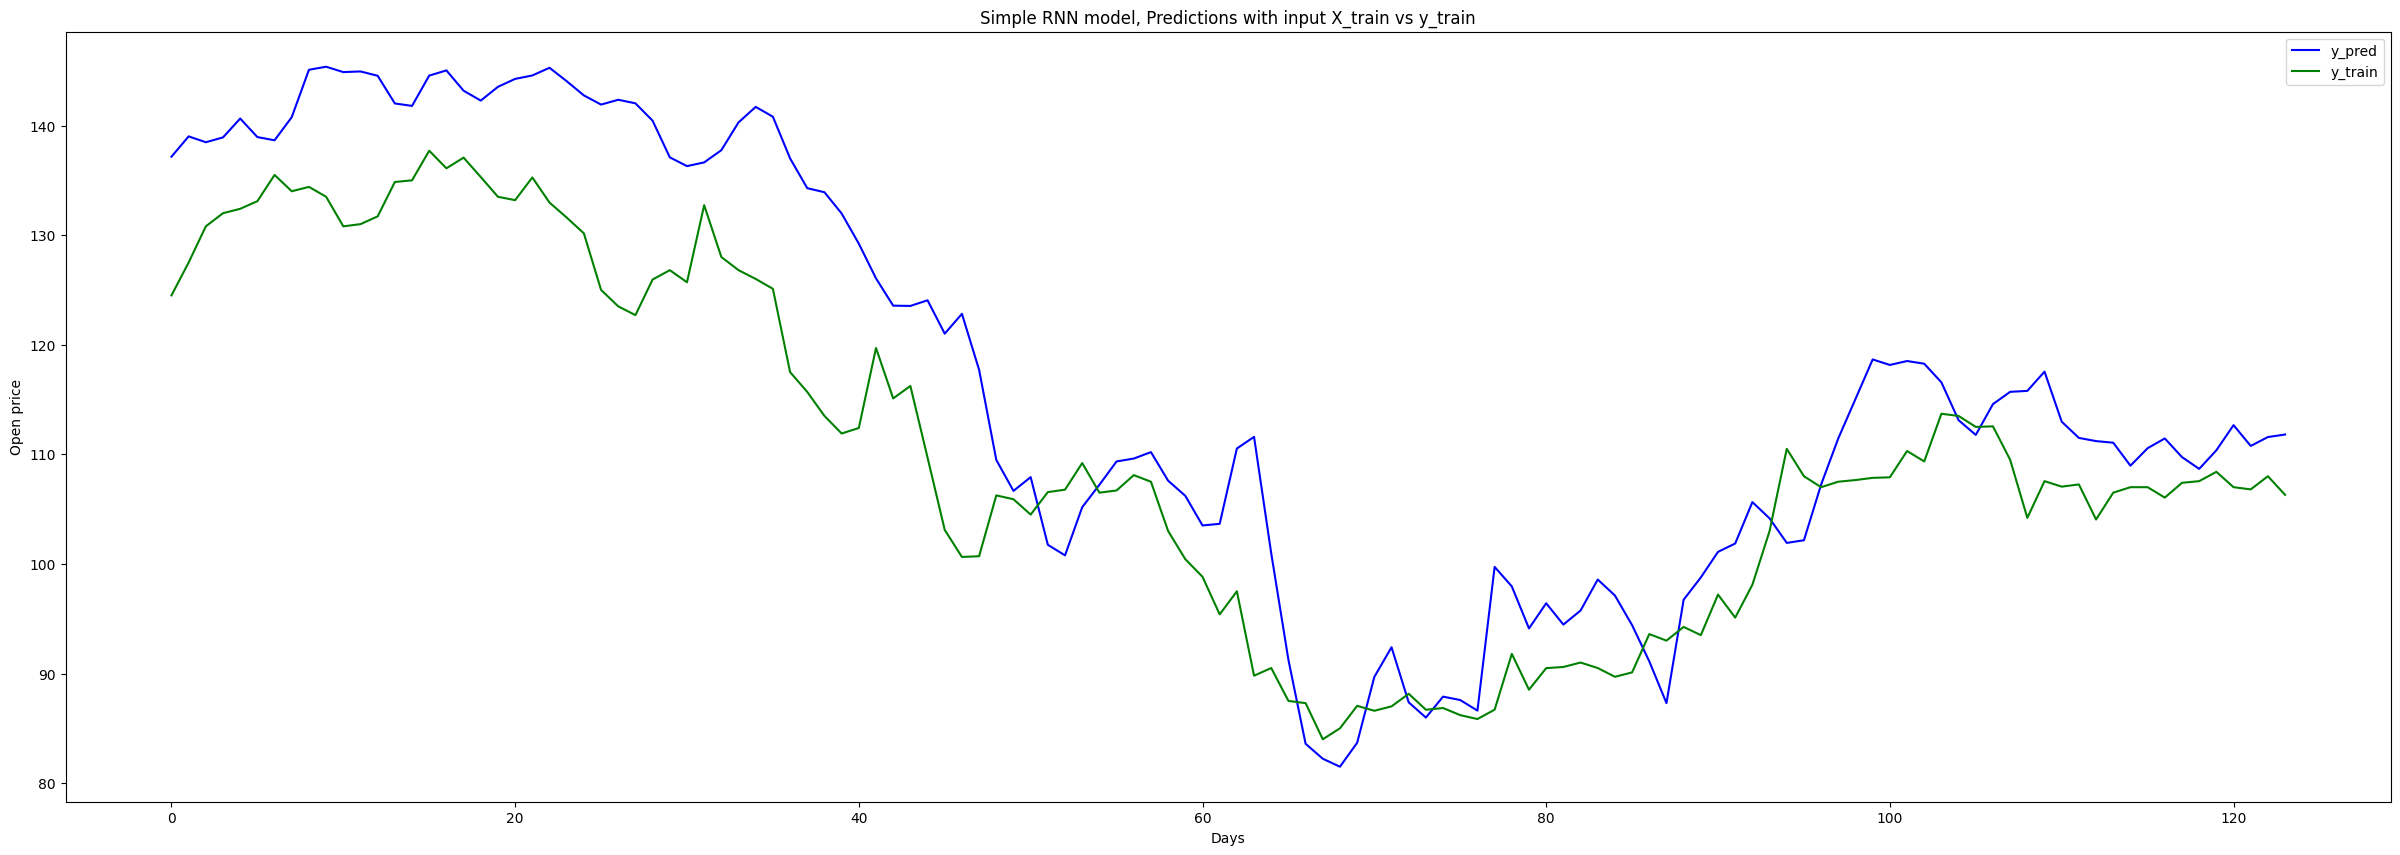

In [29]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

In [30]:
dataset_validation = validation_data.Open.values  # getting "open" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (74, 1)


In [31]:
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [32]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [33]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (24, 50)
Shape of y_test before reshape : (24,)


In [34]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [35]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (24, 50, 1)
Shape of y_test after reshape : (24, 1)


In [36]:
# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test)
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

1/1 [==============================] - 0s 35ms/step
Shape of y_pred_of_test : (24, 1)


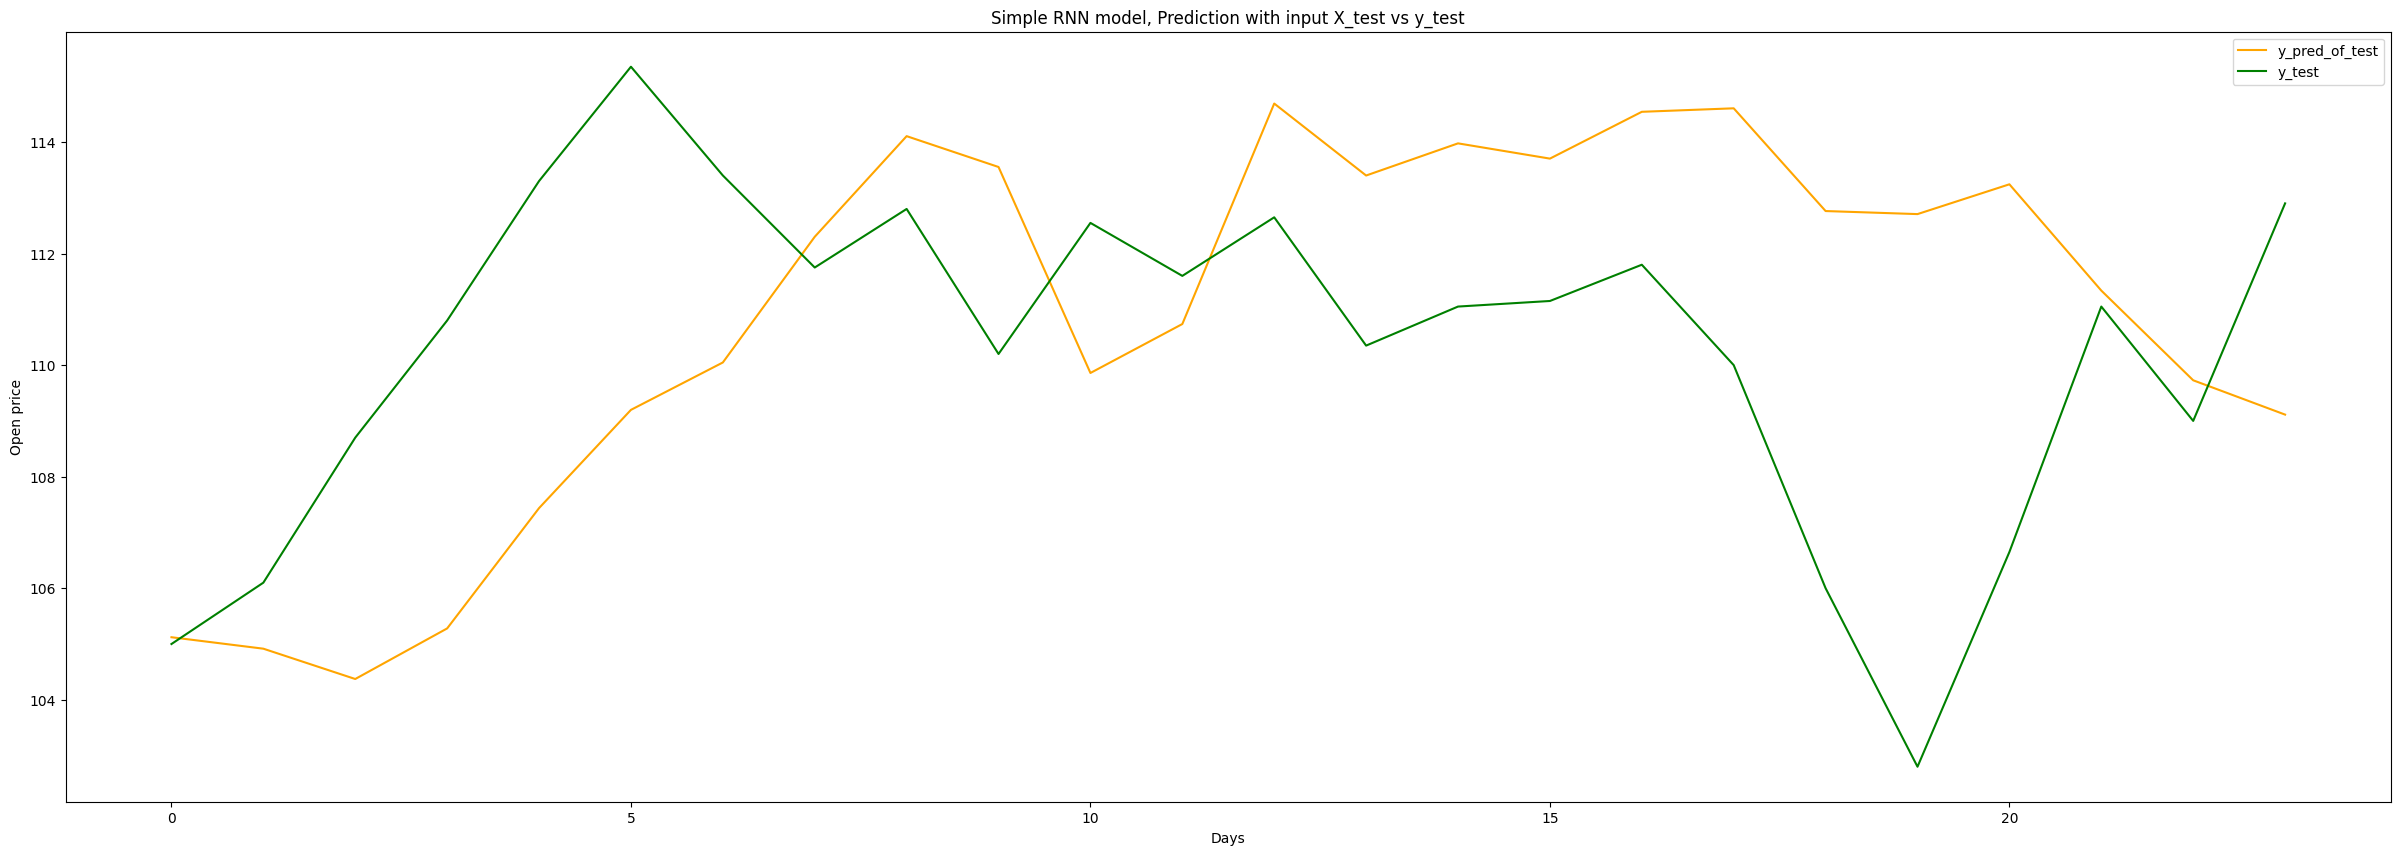

In [37]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

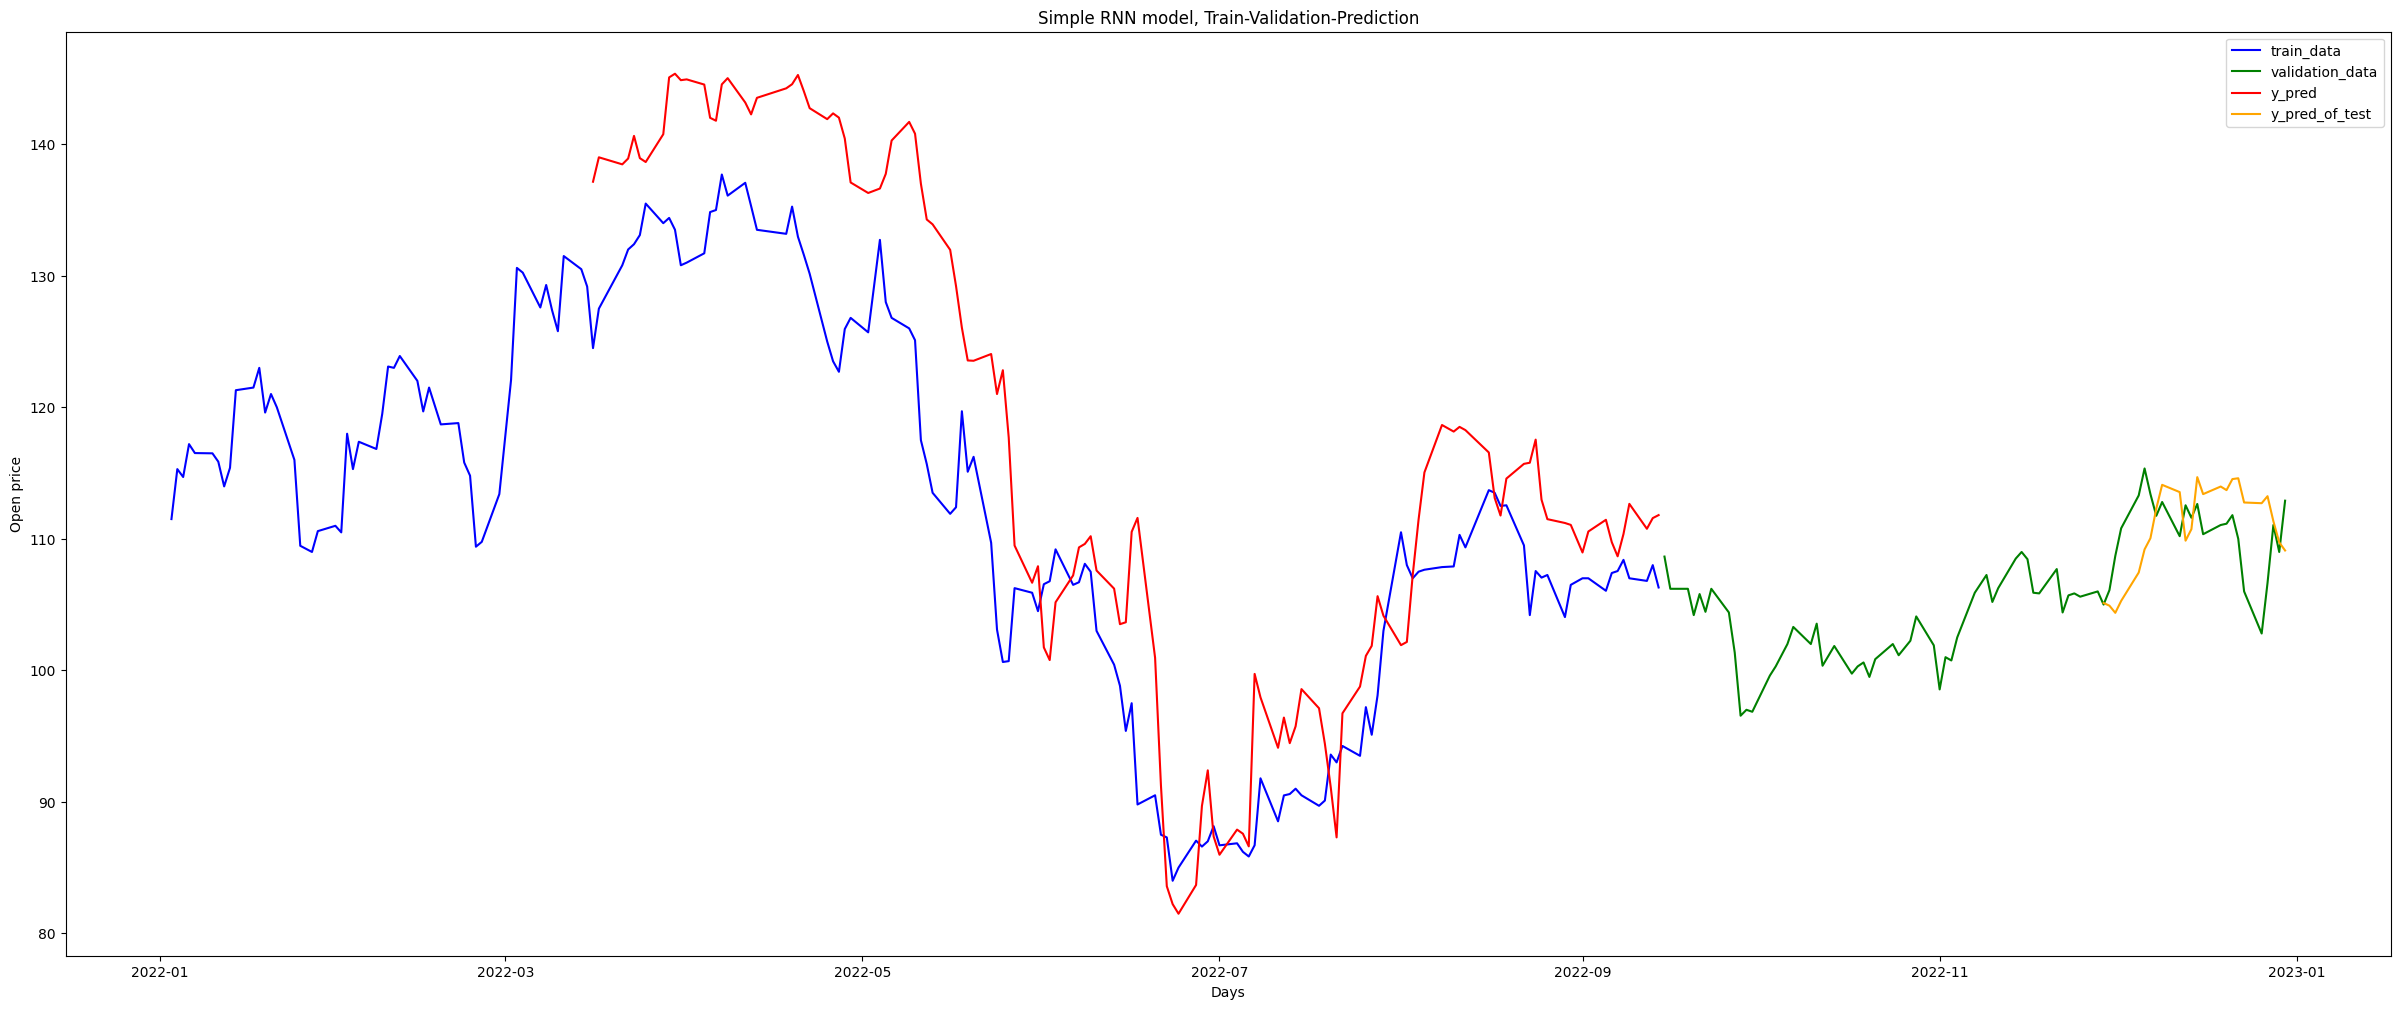

In [38]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Open, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.Open, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

In [39]:
y_train = scaler.fit_transform(y_train)

In [40]:
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) #64 lstm neuron block
model_lstm.add(
    LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = model_lstm.fit(X_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10
13/13 [==============================] - 5s 40ms/step - loss: 0.0748 - accuracy: 0.0161
Epoch 2/10
13/13 [==============================] - 1s 41ms/step - loss: 0.0268 - accuracy: 0.0161
Epoch 3/10
13/13 [==============================] - 1s 42ms/step - loss: 0.0147 - accuracy: 0.0161
Epoch 4/10
13/13 [==============================] - 1s 41ms/step - loss: 0.0119 - accuracy: 0.0161
Epoch 5/10
13/13 [==============================] - 1s 41ms/step - loss: 0.0105 - accuracy: 0.0161
Epoch 6/10
13/13 [==============================] - 1s 56ms/step - loss: 0.0088 - accuracy: 0.0161
Epoch 7/10
13/13 [==============================] - 1s 69ms/step - loss: 0.0078 - accuracy: 0.0161
Epoch 8/10
13/13 [==============================] - 1s 69ms/step - loss: 0.0079 - accuracy: 0.0161
Epoch 9/10
13/13 [==============================] - 1s 67ms/step - loss: 0.0068 - accuracy: 0.0161
Epoch 10/10
13/13 [==============================] - 1s 46ms/step - loss: 0.0068 - accuracy: 0.0161


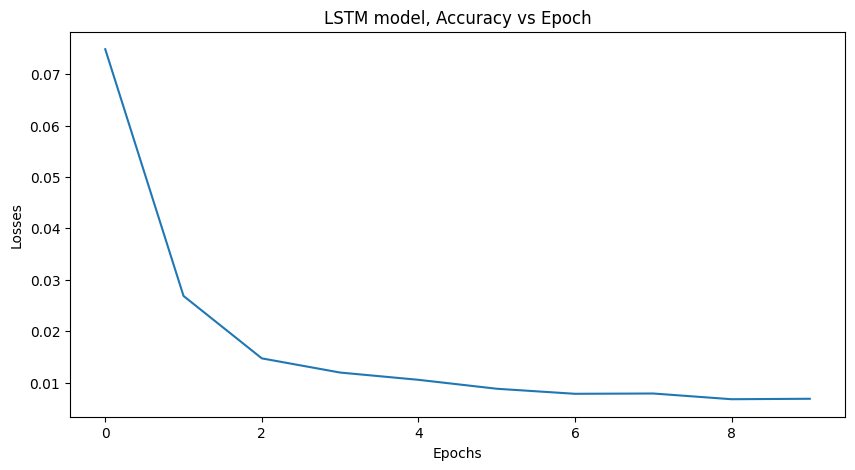

In [41]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

1/1 [==============================] - 1s 800ms/step


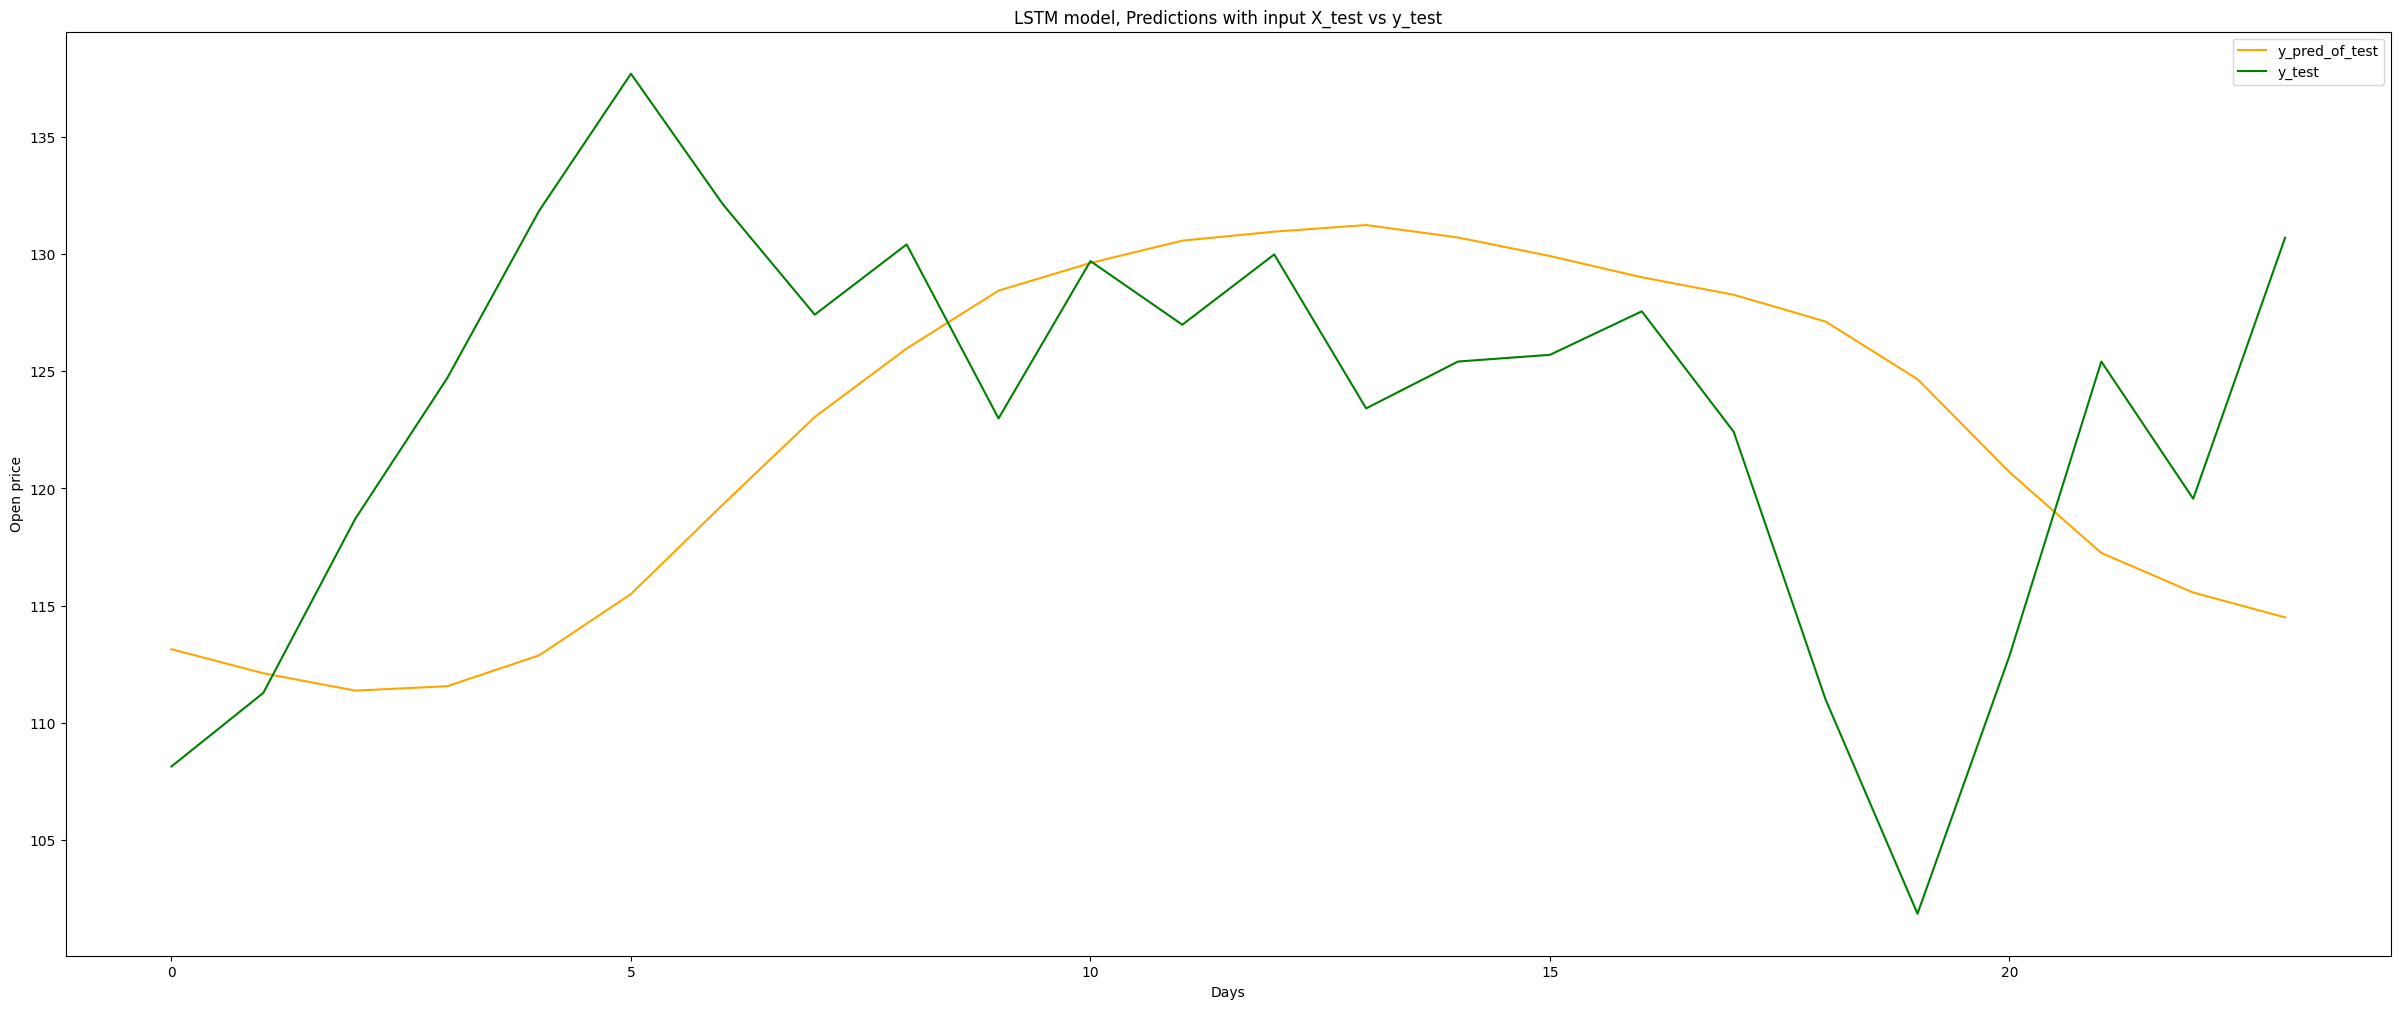

In [42]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

In [43]:
data.iloc[-1]

Date         2022-12-30
Open         112.900002
High             114.75
Low          112.099998
Close        112.650002
Adj Close    112.650002
Volume         56048485
Name: 247, dtype: object

In [44]:
X_input = data.iloc[-time_step:].Open.values               # getting last 50 rows and converting to array
X_input = scaler.fit_transform(X_input.reshape(-1,1))      # converting to 2D array and scaling
X_input = np.reshape(X_input, (1,50,1))                    # reshaping : converting to 3D array
print("Shape of X_input :", X_input.shape)
X_input

Shape of X_input : (1, 50, 1)


array([[[0.05654745],
        [0.13690453],
        [0.20535702],
        [0.15476186],
        [0.22023797],
        [0.33035696],
        [0.19940473],
        [0.        ],
        [0.14583319],
        [0.13095223],
        [0.23511893],
        [0.43750003],
        [0.5178571 ],
        [0.39583308],
        [0.45833328],
        [0.59226188],
        [0.6220238 ],
        [0.58928551],
        [0.43750003],
        [0.43452366],
        [0.54464264],
        [0.34821429],
        [0.42559499],
        [0.43452366],
        [0.4196427 ],
        [0.44345232],
        [0.38392849],
        [0.44940461],
        [0.60416647],
        [0.72916687],
        [0.87797643],
        [1.        ],
        [0.88392872],
        [0.78571432],
        [0.84821452],
        [0.69345221],
        [0.83333356],
        [0.77678565],
        [0.83928585],
        [0.70238087],
        [0.74404782],
        [0.75000011],
        [0.78869069],
        [0.68154762],
        [0.44345232],
        [0

In [46]:
simple_RNN_prediction = scaler.inverse_transform(regressor.predict(X_input))
LSTM_prediction = scaler.inverse_transform(model_lstm.predict(X_input))
print("Simple RNN, Open price prediction for 7/11/2023      :", simple_RNN_prediction[0,0])
print("LSTM prediction, Open price prediction for 7/11/2023 :", LSTM_prediction[0,0])

1/1 [==============================] - 0s 129ms/step
Simple RNN, Open price prediction for 7/11/2023      : 106.6224
LSTM prediction, Open price prediction for 7/11/2023 : 107.55139
